# P1
## Método de sobrerelajación para la capacitancia de un condensador no trivial

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_dilation

def sor_n(n):
    # Parametros
    N = n
    M = N
    deltar = 1. / (N + 1)
    deltat = M // 5
    V = 1.
    L = 1.
    R = L/4

    # Crea arreglo de coordenadas
    i_idx, j_idx = np.meshgrid(np.arange(1, N + 1), np.arange(1, N + 1))
    x_vals = np.arange(N) * deltar

    # Definición de máscara circular central
    x = np.linspace(0, L, N + 2)
    y = np.linspace(0, L, N + 2)
    X, Y = np.meshgrid(x, y)
    circle_mask = (X - L/2)**2 + (Y - L/2)**2 < R**2

    # Inicializa arreglos
    v = np.zeros((N + 2, N + 2))
    v_old = np.zeros((N, N))
    v1 = np.zeros((N, N))

    # Potenciales en bordes
    v[0, :] = V
    v[-1, :] = V
    v[:, 0] = V
    v[:, -1] = V

    v[circle_mask] = -V

    w = 2. / (1 + np.pi / N)

    # Arreglos
    err_sor = np.empty(M)

    count = 0
    for k in range(M):
        # Snapshot de la solucion cada deltat iteraciones
        if k % deltat == 0:
            print(f'count={count}')
            plt.figure(figsize=(6, 5))
            plt.imshow(v, extent=[0, L, 0, L], origin='lower', cmap='coolwarm')
            plt.colorbar(label='Potencial')
            plt.title(f'Iteración {k}')
            plt.show()
            count += 1
            
        # Método SOR y cálculo de error
        v_old[:,:] = v[1:-1, 1:-1]#.copy()
        for i in range(1, N + 1):
            for j in range(1, N + 1):
                resid = (v[i + 1, j] + v[i - 1, j] + v[i, j + 1] + v[i, j - 1] - 4. * v[i, j])
                v[i, j] += 0.25 * w * resid

                # Bordes por iteración
                v[0, :] = V
                v[-1, :] = V
                v[:, 0] = V
                v[:, -1] = V
                v[circle_mask] = -V
                

        diff = v[1:-1, 1:-1] - v_old
        err_sor[k] = np.sqrt(np.mean(diff ** 2))

    # Crear máscara del círculo y su borde
    circle_mask = (X - L/2)**2 + (Y - L/2)**2 < R**2
    circle_dilated = binary_dilation(circle_mask)
    circle_border = circle_dilated & ~circle_mask

    # Inicializar carga total
    Q = 0.0

    # Recorre los puntos de la frontera
    for i in range(1, N + 1):
        for j in range(1, N + 1):
            if circle_border[i, j]:
                # Derivadas centradas
                dv_dx = (v[i, j+1] - v[i, j-1]) / (2 * deltar)
                dv_dy = (v[i+1, j] - v[i-1, j]) / (2 * deltar)

                # Vector normal al círculo (aproximado)
                dx = X[i, j] - L/2
                dy = Y[i, j] - L/2
                norm = np.sqrt(dx**2 + dy**2)
                nx = dx / norm
                ny = dy / norm

                # Componente normal del campo eléctrico
                En = -(dv_dx * nx + dv_dy * ny)

                # Aproximar integral como suma: campo × elemento de borde
                Q += En * deltar  # deltar ≈ dl

    # Constante 1/4π
    Q *= 1 / (4 * np.pi)

    # Capacitancia
    C = Q / (2 * V)

    print(f"Capacitancia estimada: C = {C:.6f}")

    return C

    

count=0


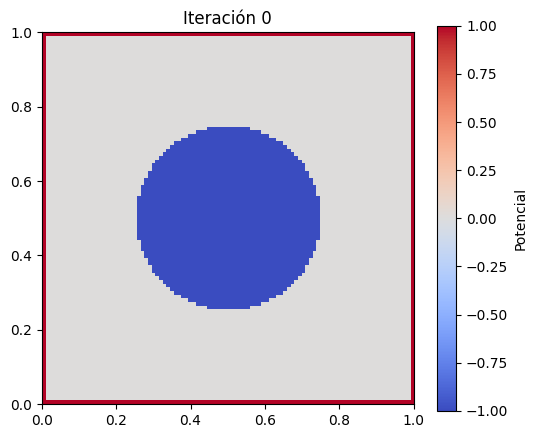

count=1


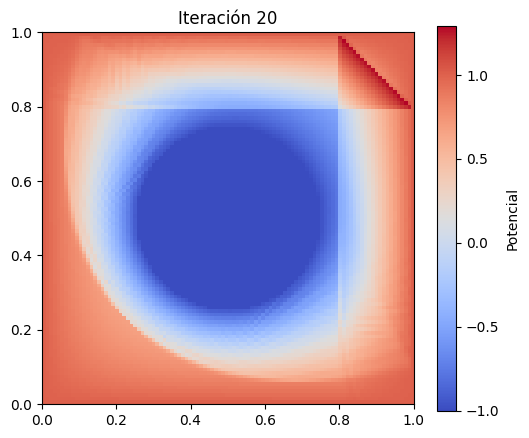

count=2


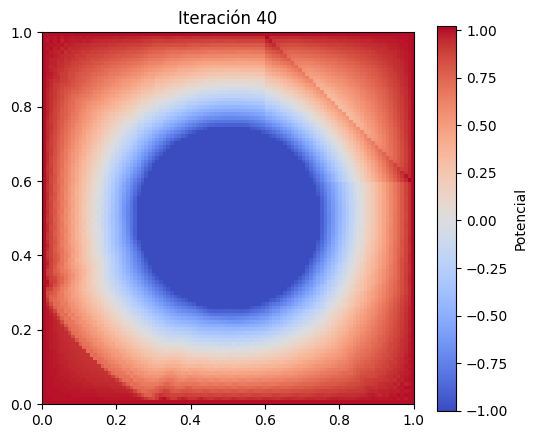

count=3


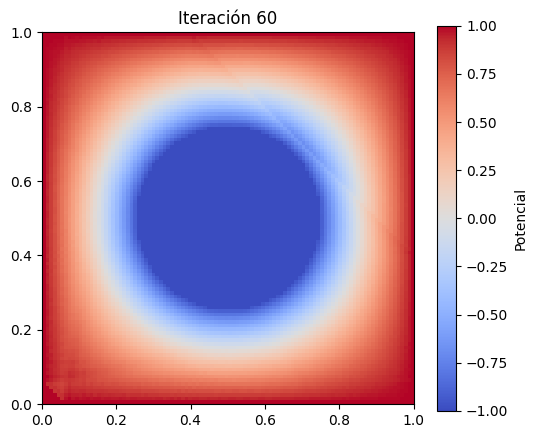

count=4


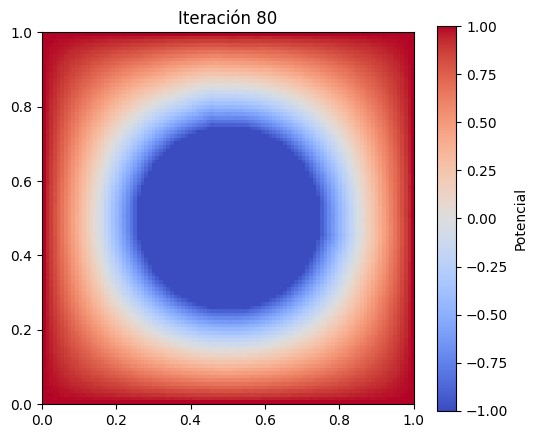

Capacitancia estimada: C = -0.554632


In [16]:
C_100 = sor_n(100)

count=0


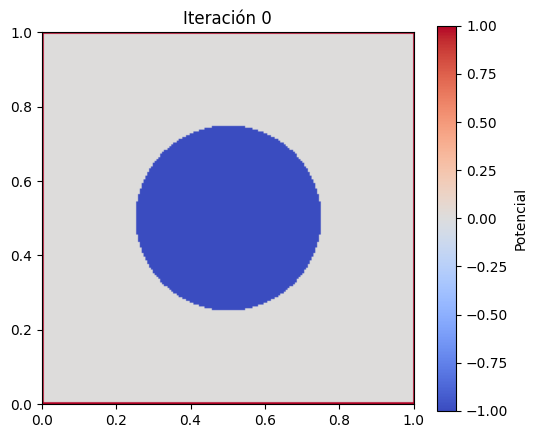

count=1


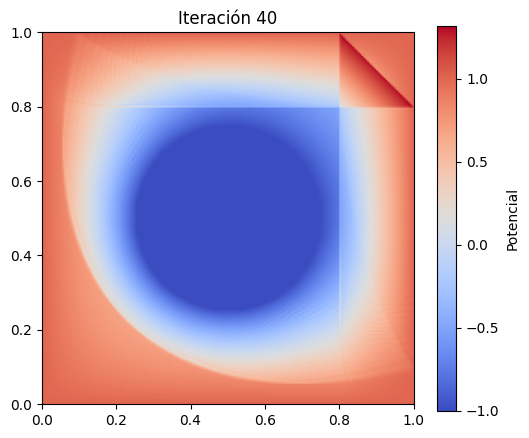

count=2


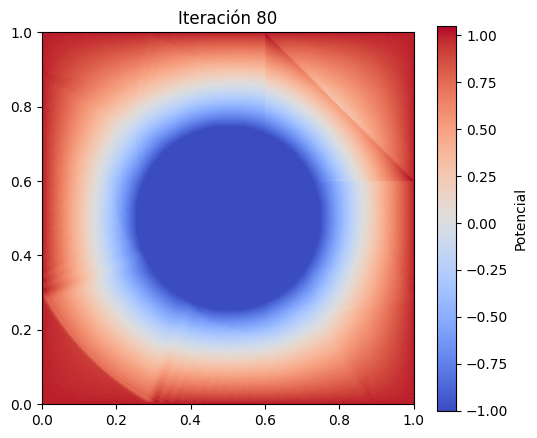

count=3


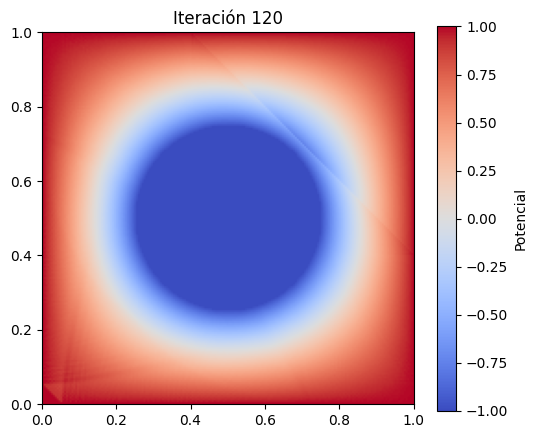

count=4


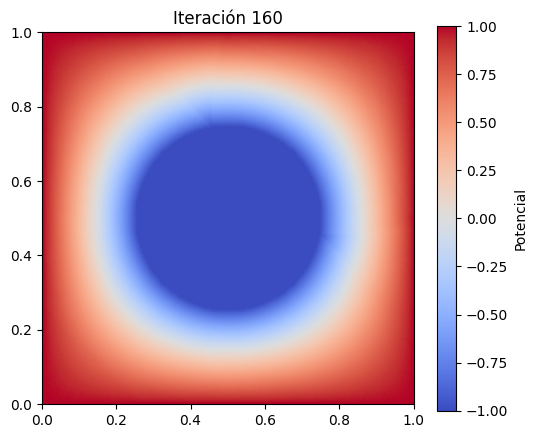

Capacitancia estimada: C = -0.565158


In [17]:
C_200 = sor_n(200)

In [18]:
difper = (C_100 - C_200)*100
print(f"Diferencia porcentual: {difper:.4f}%")

Diferencia porcentual: 1.0525%


# P2
## Método pseudo-espectral para la ecuación de Burger

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

N=100 # numero de pasos espaciales
deltax = 1/N # paso espacial
alpha=100 # value of the combination deltat/deltax (en unidades adimensionalizadas)
deltat = alpha*deltax #paso temporal
M=int(1/deltat) #numero de pasos de modo que la simulacion corra hasta t=1
print('M=',M)
v0=np.empty(N)
v_theo=np.empty(N)
x=np.empty(N)

for i in range(N):
    v0[i] = np.sin(i*2*math.pi/N)
    x[i] = i/N

def derivada(v,t):
    vf = np.fft.fft(v)
    freq = np.fft.fftfreq(N, d=1)
    return -alpha*np.real(np.fft.ifft(2*np.pi*1j*freq*vf))

L = 20
t = np.linspace(0,M,L)
u = odeint(derivada,v0,t)

for j in range(L):
    for i in range(N):
        v_theo[i] = np.sin(2*math.pi*(i/N-j/(L-1)))
    print("j=",j)
    plt.figure(figsize=(10,10))
    plt.xlabel('$x$')
    plt.ylabel('$y$')
#        plt.xlim(0.6,0.7)
#        plt.ylim(-1.1,1.1)
    plt.plot(x,u[j,:],color='blue')#'bo', markersize=1)
    plt.plot(x,v_theo,color='red',linestyle='dashed')
    plt.tight_layout()
    if j < 10:
        plt.savefig('test00'+str(j), dpi=None)
    else:
        if j < 100:
            plt.savefig('test0'+str(j), dpi=None)
        else:
            plt.savefig('test'+str(count), dpi=None)
    plt.close()